<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/deep_neural_networks/deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

dense = tf.keras.layers.Dense(30, activation = 'relu', kernel_initializer = 'he_normal')

#Nonsaturating Activation Functions

Leaky ReLU

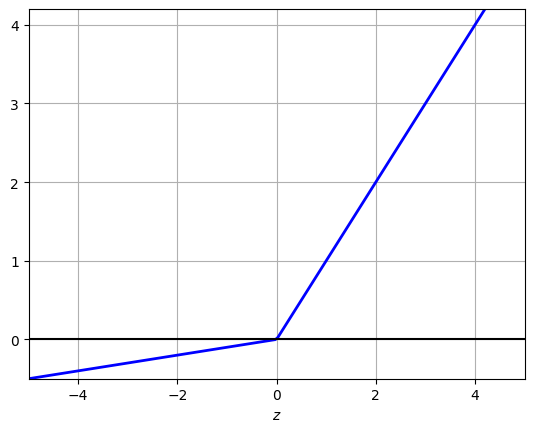

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(z, alpha = 0.1):
    return np.maximum(alpha * z, z)

data = np.linspace(-5, 5, 200)
plt.plot(data, leaky_relu(data), "b-", linewidth = 2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.grid(True)
plt.axis([-5, 5, -0.5, 4.2])
plt.xlabel("$z$");

In [ ]:
leaky_relu = tf.keras.layers.LeakyReLU(negative_slope = 0.2)  #defaults to alpha = 0.3
dense = tf.keras.layers.Dense(30, activation = leaky_relu, kernel_initializer = 'he_normal')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation = "leaky_relu", kernel_initializer = 'he_normal'),
    tf.keras.layers.LeakyReLU(negative_slope = 0.2)
])

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = [28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, kernel_initializer = 'he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(100, kernel_initializer = 'he_normal', activation = 'leaky_relu'),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer = 'glorot_normal')
])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7856 - loss: 0.6030 - val_accuracy: 0.8542 - val_loss: 0.3903
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8629 - loss: 0.3694 - val_accuracy: 0.8720 - val_loss: 0.3427
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8780 - loss: 0.3305 - val_accuracy: 0.8748 - val_loss: 0.3485
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8882 - loss: 0.3017 - val_accuracy: 0.8782 - val_loss: 0.3253
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8939 - loss: 0.2861 - val_accuracy: 0.8644 - val_loss: 0.3613
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8983 - loss: 0.2719 - val_accuracy: 0.8850 - val_loss: 0.3180
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9039 - loss: 0.2563 - val_accuracy: 0.8856 - val_loss: 0.3243
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9079 - loss: 0.2425 

#ELU

In [ ]:
tf.keras.layers.Dense(10, activation = "elu", kernel_initializer = "he_normal")

<Dense name=dense_6, built=False>

#SELU

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
for i in range(100):
    model.add(tf.keras.layers.Dense(100, activation = "selu",
                                    kernel_initializer = "lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
pixel_names = X_train.mean(axis = 0, keepdims = True)
pixel_stds = X_train.std(axis = 0, keepdims = True)
X_train_scaled = (X_train - pixel_names) / pixel_stds
X_valid_scaled = (X_valid - pixel_names) / pixel_stds
X_test_scaled = (X_test - pixel_names) / pixel_stds

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
              metrics = ["accuracy"])

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 5,
          validation_data = (X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.3302 - loss: 1.7453 - val_accuracy: 0.5544 - val_loss: 1.1586
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5326 - loss: 1.1930 - val_accuracy: 0.7074 - val_loss: 0.8025
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7085 - loss: 0.7892 - val_accuracy: 0.7576 - val_loss: 0.6896
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7519 - loss: 0.6744 - val_accuracy: 0.7782 - val_loss: 0.6093
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7700 - loss: 0.6333 - val_accuracy: 0.7934 - val_loss: 0.5687


In [ ]:
tf.random.set_seed(42)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
for i in range(100):
    model.add(tf.keras.layers.Dense(100, activation = "relu",
                                    kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
              metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.1871 - loss: 2.1168 - val_accuracy: 0.3110 - val_loss: 1.5360
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.4117 - loss: 1.3856 - val_accuracy: 0.5794 - val_loss: 1.0073
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5915 - loss: 0.9809 - val_accuracy: 0.6554 - val_loss: 0.9232
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6179 - loss: 0.9809 - val_accuracy: 0.6208 - val_loss: 1.0268
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6422 - loss: 0.9268 - val_accuracy: 0.7258 - val_loss: 0.7798


#Batch Normalization

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
              metrics = ["accuracy"])

model.fit(X_train_scaled, y_train, epochs = 2, validation_data = (X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5868 - loss: 1.2621 - val_accuracy: 0.4410 - val_loss: 1.7932
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7813 - loss: 0.6423 - val_accuracy: 0.4490 - val_loss: 1.7971


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, kernel_initializer = "he_normal", use_bias = False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer = "he_normal", use_bias = False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation = "softmax", kernel_initializer = "glorot_normal")
])

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])
model.fit(X_train_scaled, y_train, epochs = 2, validation_data = (X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7252 - loss: 0.8472 - val_accuracy: 0.2892 - val_loss: 1.9165
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8466 - loss: 0.4437 - val_accuracy: 0.2644 - val_loss: 1.9805


#Gradient Clipping

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipvalue = 1.0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer)

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipnorm = 1.0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer)

In [ ]:
# sequential, functional, subclaster

#Reusing Pretained Layers

In [ ]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10))-set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id #reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([tf.keras.layers.Input(shape = [28, 28]),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(300, activation = "relu", kernel_initializer = "he_normal"),
                               tf.keras.layers.Dense(100, activation = "relu", kernel_initializer = "he_normal"),
                               tf.keras.layers.Dense(8, activation = "softmax", kernel_initializer = "glorot_normal")])

model_A.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                 metrics = ["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs = 20, validation_data = (X_valid_A, y_valid_A))
model_A.save("my_model_A.keras")

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4841 - loss: 1.5761 - val_accuracy: 0.7779 - val_loss: 0.7854
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7880 - loss: 0.7226 - val_accuracy: 0.8278 - val_loss: 0.5709
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8322 - loss: 0.5534 - val_accuracy: 0.8433 - val_loss: 0.4856
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8517 - loss: 0.4782 - val_accuracy: 0.8566 - val_loss: 0.4380
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8618 - loss: 0.4338 - val_accuracy: 0.8621 - val_loss: 0.4069
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8701 - loss: 0.4037 - val_accuracy: 0.8681 - val_loss: 0.3846
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8757 - loss: 0.3814 - val_accuracy: 0.8729 - val_loss: 0.3676
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8802 - loss: 0.3640 - 

In [ ]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([tf.keras.layers.Input(shape = [28, 28]),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(300, activation = "relu", kernel_initializer = "he_normal"),
                               tf.keras.layers.Dense(100, activation = "relu", kernel_initializer = "he_normal"),
                               tf.keras.layers.Dense(1, activation = "sigmoid", kernel_initializer = "glorot_normal")])

model_B.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                 metrics = ["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs = 20, validation_data = (X_valid_B, y_valid_B))

model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.2983 - loss: 0.7385 - val_accuracy: 0.3927 - val_loss: 0.7239
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3952 - loss: 0.7180 - val_accuracy: 0.4718 - val_loss: 0.7055
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4697 - loss: 0.6992 - val_accuracy: 0.5490 - val_loss: 0.6887
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5694 - loss: 0.6822 - val_accuracy: 0.6162 - val_loss: 0.6737
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6439 - loss: 0.6666 - val_accuracy: 0.6716 - val_loss: 0.6597
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7007 - loss: 0.6522 - val_accuracy: 0.7369 - val_loss: 0.6467
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7499 - loss: 0.6388 - val_accuracy: 0.7735 - val_loss: 0.6344
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7595 - loss: 0.6262 - val_accuracy: 0.8012 - val_loss: 0.6227

[0.5136285424232483, 0.9004999995231628]

In [ ]:
model_A = tf.keras.models.load_model("my_model_A.keras")
model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model_B_on_A.compile(loss = "binary_crossentropy", optimizer = optimizer,
                     metrics = ["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs = 4,
                           validation_data = (X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6532 - loss: 0.6310 - val_accuracy: 0.6439 - val_loss: 0.6432
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7111 - loss: 0.6192 - val_accuracy: 0.6597 - val_loss: 0.6338
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6986 - loss: 0.6132 - val_accuracy: 0.6588 - val_loss: 0.6274
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7174 - loss: 0.6082 - val_accuracy: 0.6706 - val_loss: 0.6220


In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model_B_on_A.compile(loss = "binary_crossentropy", optimizer = optimizer,
                     metrics = ["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs = 16,
                           validation_data = (X_valid_B, y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.7429 - loss: 0.5968 - val_accuracy: 0.7280 - val_loss: 0.5870
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7827 - loss: 0.5617 - val_accuracy: 0.7685 - val_loss: 0.5555
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8288 - loss: 0.5291 - val_accuracy: 0.8071 - val_loss: 0.5271
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8659 - loss: 0.4997 - val_accuracy: 0.8289 - val_loss: 0.5015
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8892 - loss: 0.4733 - val_accuracy: 0.8467 - val_loss: 0.4785
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8965 - loss: 0.4496 - val_accuracy: 0.8605 - val_loss: 0.4579
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9110 - loss: 0.4285 - val_accuracy: 0.8704 - val_loss: 0.4394
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9110 - loss: 0.4096 - val_accuracy: 0.8823 - val_loss: 0.4227

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9103 - loss: 0.3404


[0.3425046503543854, 0.9054999947547913]

In [ ]:
(1 - (100 - 91.9) / (100 - 91.2)) * 100
# sehvlerin nece faiz azaldigi

7.954545454545492

In [ ]:
# binary classification, neural network uzerinde elemek, vizuallasdir

In [ ]:
def build_model(seed = 42):
    tf.random.set_seed(seed)
    return tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = [28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation = "relu",
                              kernel_initializer = "he_normal"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation = "relu",
                              kernel_initializer = "he_normal"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation = "relu",
                              kernel_initializer = "he_normal"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation = "softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer,
                  metrics = ["accuracy"])
    return model.fit(X_train_scaled, y_train, epochs = 10,
                     validation_data = (X_valid_scaled, y_valid))

#Momentum optimization

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)

In [ ]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7153 - loss: 0.8618 - val_accuracy: 0.8356 - val_loss: 0.4378
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8418 - loss: 0.4540 - val_accuracy: 0.8554 - val_loss: 0.3961
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8612 - loss: 0.3933 - val_accuracy: 0.8624 - val_loss: 0.3767
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8753 - loss: 0.3553 - val_accuracy: 0.8678 - val_loss: 0.3655
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8856 - loss: 0.3253 - val_accuracy: 0.8678 - val_loss: 0.3591
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8944 - loss: 0.3004 - val_accuracy: 0.8702 - val_loss: 0.3571
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9019 - loss: 0.2785 - val_accuracy: 0.8708 - val_loss: 0.3545
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9109 - loss: 0.2583 - 

#Nesterov Accelerated Gradient

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9, nesterov = True)

In [ ]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7239 - loss: 0.8343 - val_accuracy: 0.8520 - val_loss: 0.4111
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8450 - loss: 0.4397 - val_accuracy: 0.8618 - val_loss: 0.3787
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8654 - loss: 0.3808 - val_accuracy: 0.8664 - val_loss: 0.3670
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8786 - loss: 0.3441 - val_accuracy: 0.8710 - val_loss: 0.3628
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8879 - loss: 0.3151 - val_accuracy: 0.8730 - val_loss: 0.3612
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8975 - loss: 0.2914 - val_accuracy: 0.8754 - val_loss: 0.3631
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9048 - loss: 0.2698 - val_accuracy: 0.8742 - val_loss: 0.3677
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9135 - loss: 0.2501

#AdaGrad

In [ ]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.001)

In [ ]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6106 - loss: 1.1965 - val_accuracy: 0.7982 - val_loss: 0.6030
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7805 - loss: 0.6491 - val_accuracy: 0.8152 - val_loss: 0.5281
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8023 - loss: 0.5780 - val_accuracy: 0.8260 - val_loss: 0.4930
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8157 - loss: 0.5405 - val_accuracy: 0.8320 - val_loss: 0.4712
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8241 - loss: 0.5154 - val_accuracy: 0.8364 - val_loss: 0.4562
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8302 - loss: 0.4970 - val_accuracy: 0.8398 - val_loss: 0.4450
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8355 - loss: 0.4824 - val_accuracy: 0.8414 - val_loss: 0.4364
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8390 - loss: 0.4705 - 

#RMSProp

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)

In [ ]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7790 - loss: 0.6322 - val_accuracy: 0.8674 - val_loss: 0.3642
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8590 - loss: 0.3892 - val_accuracy: 0.8740 - val_loss: 0.3388
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8799 - loss: 0.3308 - val_accuracy: 0.8780 - val_loss: 0.3428
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8950 - loss: 0.2906 - val_accuracy: 0.8796 - val_loss: 0.3462
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9053 - loss: 0.2607 - val_accuracy: 0.8790 - val_loss: 0.3650
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9159 - loss: 0.2343 - val_accuracy: 0.8780 - val_loss: 0.3799
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9250 - loss: 0.2111 - val_accuracy: 0.8762 - val_loss: 0.4058
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9328 - loss: 0.1915 

#Adam Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7725 - loss: 0.6495 - val_accuracy: 0.8560 - val_loss: 0.3765
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8563 - loss: 0.3939 - val_accuracy: 0.8648 - val_loss: 0.3509
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8771 - loss: 0.3376 - val_accuracy: 0.8668 - val_loss: 0.3511
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8911 - loss: 0.2982 - val_accuracy: 0.8738 - val_loss: 0.3507
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9017 - loss: 0.2675 - val_accuracy: 0.8716 - val_loss: 0.3642
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9128 - loss: 0.2406 - val_accuracy: 0.8712 - val_loss: 0.3832
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9219 - loss: 0.2154 - val_accuracy: 0.8692 - val_loss: 0.4013
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9299 - loss: 0.1942

In [ ]:
# statementleri oxuyub basa dusmelidi, insan hansi ruh halinda idi. TFIDF.

#Adamax Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7494 - loss: 0.7200 - val_accuracy: 0.8660 - val_loss: 0.3795
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8555 - loss: 0.4053 - val_accuracy: 0.8784 - val_loss: 0.3465
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8777 - loss: 0.3420 - val_accuracy: 0.8778 - val_loss: 0.3357
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8941 - loss: 0.3003 - val_accuracy: 0.8796 - val_loss: 0.3329
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9054 - loss: 0.2669 - val_accuracy: 0.8816 - val_loss: 0.3373
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9154 - loss: 0.2388 - val_accuracy: 0.8776 - val_loss: 0.3439
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9265 - loss: 0.2130 - val_accuracy: 0.8776 - val_loss: 0.3534
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9358 - loss: 0.1892 

#Nadam Optimization

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7727 - loss: 0.6589 - val_accuracy: 0.8592 - val_loss: 0.3780
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8579 - loss: 0.3906 - val_accuracy: 0.8676 - val_loss: 0.3607
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8762 - loss: 0.3369 - val_accuracy: 0.8712 - val_loss: 0.3609
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8921 - loss: 0.2955 - val_accuracy: 0.8754 - val_loss: 0.3532
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9039 - loss: 0.2639 - val_accuracy: 0.8756 - val_loss: 0.3648
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9124 - loss: 0.2361 - val_accuracy: 0.8784 - val_loss: 0.3899
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9220 - loss: 0.2131 - val_accuracy: 0.8750 - val_loss: 0.4016
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9290 - loss: 0.193

#AdamW Optimization

In [ ]:
optimizer = tf.keras.optimizers.AdamW(weight_decay = 1e-5, learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7741 - loss: 0.6413 - val_accuracy: 0.8612 - val_loss: 0.3704
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8599 - loss: 0.3873 - val_accuracy: 0.8672 - val_loss: 0.3515
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8792 - loss: 0.3324 - val_accuracy: 0.8752 - val_loss: 0.3375
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8931 - loss: 0.2939 - val_accuracy: 0.8770 - val_loss: 0.3403
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9044 - loss: 0.2625 - val_accuracy: 0.8756 - val_loss: 0.3613
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9127 - loss: 0.2356 - val_accuracy: 0.8804 - val_loss: 0.3759
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9225 - loss: 0.2136 - val_accuracy: 0.8698 - val_loss: 0.4057
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9303 - loss: 0.191

# Learning Rate Scheduling

# Inverse Time Decay Scheduling

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10000,
    decay_rate = 1.0,
    staircase = False
)

optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

# Exponential Scheduling

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10000,
    decay_rate = 0.1,
    staircase = False
)

optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [ ]:
history_exponential_decay = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7296 - loss: 0.8052 - val_accuracy: 0.8448 - val_loss: 0.4387
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8418 - loss: 0.4517 - val_accuracy: 0.8564 - val_loss: 0.4042
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8593 - loss: 0.4006 - val_accuracy: 0.8608 - val_loss: 0.3899
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8688 - loss: 0.3740 - val_accuracy: 0.8630 - val_loss: 0.3825
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8751 - loss: 0.3579 - val_accuracy: 0.8662 - val_loss: 0.3777
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8783 - loss: 0.3474 - val_accuracy: 0.8664 - val_loss: 0.3751
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8806 - loss: 0.3406 - val_accuracy: 0.8670 - val_loss: 0.3736
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8826 - loss: 0.3360 - 

# Piecewise Constant Scheduling

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries = [30000, 40000],
    values = [0.01, 0.005, 0.001]
)

optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)
history_piecewise_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7226 - loss: 0.8211 - val_accuracy: 0.8496 - val_loss: 0.4142
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8423 - loss: 0.4470 - val_accuracy: 0.8630 - val_loss: 0.3748
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8630 - loss: 0.3871 - val_accuracy: 0.8700 - val_loss: 0.3598
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8767 - loss: 0.3486 - val_accuracy: 0.8760 - val_loss: 0.3526
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8872 - loss: 0.3192 - val_accuracy: 0.8772 - val_loss: 0.3522
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8969 - loss: 0.2940 - val_accuracy: 0.8774 - val_loss: 0.3547
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9050 - loss: 0.2718 - val_accuracy: 0.8780 - val_loss: 0.3585
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9123 - loss: 0.2518 - 

#Avoiding Overfitting Through Regularization

In [ ]:
layer = tf.keras.layers.Dense(100, activation = "relu",
                              kernel_initializer = "he_normal",
                              kernel_regularizer = tf.keras.regularizers.l2(0.01))

In [ ]:
tf.random.set_seed(42)

In [ ]:
#keras_tuner = grid_search

In [ ]:
#layer-batch-activation

In [ ]:
#batch normalization variance 1 edir, 0 a yaxinlasdirir

In [ ]:
# batch cox olanda regularization effect az olur

In [ ]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation = "relu",
                           kernel_initializer = "he_normal",
                           kernel_regularizer = tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28, 28]),
    tf.keras.layers.Flatten(),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation = "softmax", kernel_initializer = "glorot_normal")
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer,
              metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 2, validation_data = (X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4528 - loss: 9.7801 - val_accuracy: 0.7210 - val_loss: 8.6301
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7227 - loss: 8.4663 - val_accuracy: 0.7626 - val_loss: 7.9708


#Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(300, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer = 'glorot_normal')
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer,
              metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5548 - loss: 1.2512 - val_accuracy: 0.7974 - val_loss: 0.5738
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7611 - loss: 0.6725 - val_accuracy: 0.8262 - val_loss: 0.4989
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7903 - loss: 0.5933 - val_accuracy: 0.8348 - val_loss: 0.4631
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8045 - loss: 0.5490 - val_accuracy: 0.8398 - val_loss: 0.4373
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8141 - loss: 0.5201 - val_accuracy: 0.8432 - val_loss: 0.4230
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8210 - loss: 0.5053 - val_accuracy: 0.8512 - val_loss: 0.4094
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8253 - loss: 0.4875 - val_accuracy: 0.8558 - val_loss: 0.3992
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8301 - loss: 0.4736 - 

In [ ]:
model.evaluate(X_train, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8702 - loss: 0.3629


[0.3663330376148224, 0.8694727420806885]

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8615 - loss: 0.3993


[0.4056742191314697, 0.8549000024795532]

# MC(Monte Carlo) Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
y_probas = np.stack([model(X_test, training = True) for _ in range(100)])

In [ ]:
y_probas.shape

(100, 10000, 10)

In [ ]:
y_proba = y_probas.mean(axis = 0)

In [ ]:
model.predict(X_test[:1].round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


array([[4.7346148e-05, 9.7013972e-06, 4.7131552e-06, 5.4058524e-05,
        1.8962923e-05, 3.5212301e-02, 7.4385222e-05, 1.8719663e-01,
        1.2044914e-03, 7.7617741e-01]], dtype=float32)

In [ ]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.175, 0.   , 0.199, 0.004,
       0.621], dtype=float32)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_std = y_probas.std(axis = 0)
y_std[0].round(3)

array([0.   , 0.   , 0.   , 0.001, 0.   , 0.185, 0.001, 0.137, 0.007,
       0.19 ], dtype=float32)

In [ ]:
y_proba.shape

(10000, 10)

In [ ]:
y_pred = np.argmax(y_proba, axis = 1)
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8533

In [ ]:
class MCDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs, training = None):
        return super().call(inputs, training = True)

Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])

mc_model.set_weights(model.get_weights())
mc_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout (MCDropout)               │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout_1 (MCDropout)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout_2 (MCDropout)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for layer in model.layers:
    print(layer.name, isinstance(layer, tf.keras.layers.Dropout))

flatten_15 False
dropout True
dense_58 False
dropout_1 True
dense_59 False
dropout_2 True
dense_60 False


In [ ]:
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
    for sample in range(100)], axis = 0).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━

array([[0.04, 0.02, 0.02, 0.02, 0.02, 0.64, 0.05, 0.07, 0.08, 0.05]],
      dtype=float32)

# Max norm

In [ ]:
dense = tf.keras.layers.Dense(
    100, activation = "relu", kernel_initializer = "he_normal",
    kernel_constraint = tf.keras.constraints.max_norm(1.))

MaxNormDense = partial(tf.keras.layers.Dense,
                       activation = "relu", kernel_initializer = "he_normal",
                       kernel_constraint = tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation = "softmax")
])

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer,
              metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3884 - loss: 1.9875 - val_accuracy: 0.6844 - val_loss: 1.1230
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6813 - loss: 1.0360 - val_accuracy: 0.7310 - val_loss: 0.8274
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7281 - loss: 0.8152 - val_accuracy: 0.7578 - val_loss: 0.7195
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7583 - loss: 0.7228 - val_accuracy: 0.7802 - val_loss: 0.6570
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7810 - loss: 0.6655 - val_accuracy: 0.7954 - val_loss: 0.6145
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7950 - loss: 0.6252 - val_accuracy: 0.8028 - val_loss: 0.5833
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8037 - loss: 0.5948 - val_accuracy: 0.8102 - val_loss: 0.5595
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8100 - loss: 0.5712 - 